This script investigates the influence of different audio data representations in dimensionality reduction and clustering on a dataset of goose vocalizations.

In [15]:
import glob
import librosa
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [10]:
DATAPATH = "/Users/lenagies/Desktop/Master/Thesis/geese/data/clips_from_selections"
track_paths = glob.glob(DATAPATH+"/*.wav")

In [5]:
len(track_paths)

7389

In [45]:
i = 1300
n_fft = 256

In [46]:
call, sr = librosa.load(track_paths[i], sr=None)

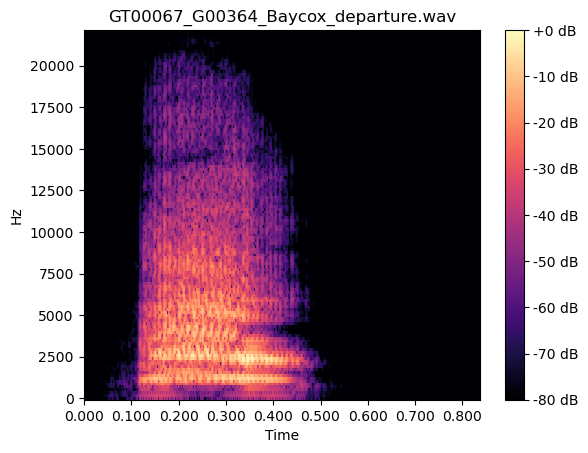

In [49]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(call, n_fft=n_fft, hop_length=(n_fft//8))), ref=np.max), sr=sr, hop_length=(512//8), x_axis='time', y_axis='linear', ax=ax)
ax.set(title=track_paths[i].split("/")[-1])
fig.colorbar(img, ax=ax, format="%+2.f dB")

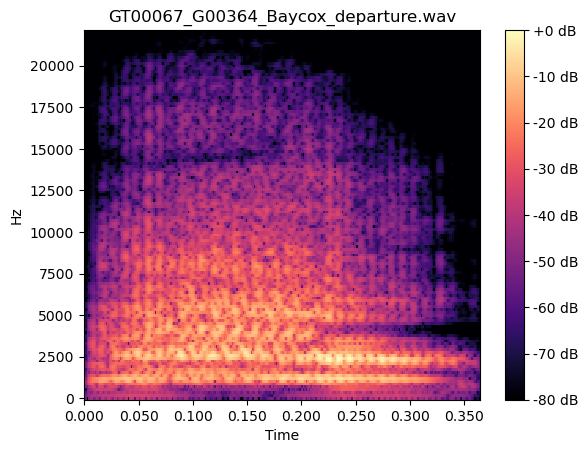

In [48]:
# trim trailing silences using db threshold, discard second entry, that holds indices
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.trim(call, top_db=40, frame_length=n_fft, hop_length=(n_fft//8))[0], n_fft=n_fft, hop_length=(n_fft//8))), ref=np.max), sr=sr, hop_length=(512//8), x_axis='time', y_axis='linear', ax=ax)
ax.set(title=track_paths[i].split("/")[-1])
fig.colorbar(img, ax=ax, format="%+2.f dB")